### Sterling E-Commerce Customer Segmentation

In [63]:
# !pip install yellowbrick

In [64]:
# Import Data Analysis Libraries
import numpy as np
import pandas as pd

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# ML and Evaluation Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

# Data Normalization Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore")

In [65]:
# Import Data
df = pd.read_excel(r"..\Internship\Sterling_E-Commerce_Data.xlsx")
df.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [66]:
df.shape

(283083, 19)

In [67]:
df['Category'].unique()

array(['Health & Sports', "Men's Fashion", 'Computing', 'Entertainment',
       'Mobiles & Tablets', 'Superstore', 'Appliances',
       'Beauty & Grooming', 'Home & Living', 'Soghaat', "Women's Fashion",
       'School & Education', 'Books', 'Kids & Baby', 'Others'],
      dtype=object)

In [68]:
df['Region'].unique()

array(['Midwest', 'West', 'South', 'Northeast'], dtype=object)

In [69]:
df['Payment Method'].unique()

array(['Easypay_MA', 'Payaxis', 'apg', 'bankalfalah', 'cod',
       'customercredit', 'easypay_voucher', 'Easypay', 'jazzvoucher',
       'jazzwallet', 'mcblite', 'cashatdoorstep', 'financesettlement'],
      dtype=object)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

**Observation**
- Order Id: Missing values
- Customer since and Date of Order: Wrong datatype [Should be an Object]

In [71]:
# Impute order quantity with mean
#df['Order Id'].fillna(df['Order Id'].mean(), inplace=True)


## Data Pre-Processing and Feature Engineering

In [72]:
# Checking for missing values
null_val = df.isnull().sum()
null_val

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [73]:
# Drop null values
df.dropna(inplace=True)

- Five missing values in Order Id column

In [74]:
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [75]:
# Numerical Statistical Analysis
df.describe()

,Cust Id,Customer Since,Date of Order,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283078.000000,283078,283078,283078.000000,2.830780e+05,283078.000000,283078.000000,283078.000000,283078.000000
mean,70106.401674,2007-10-11 21:38:59.406100224,2022-03-12 12:21:32.285518336,741745.081239,1.004570e+08,561103.707236,49147.444333,3.008238,816.232342
min,4.000000,1978-11-04 00:00:00,2021-10-01 00:00:00,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,2002-08-24 00:00:00,2021-12-24 00:00:00,659897.250000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,2010-03-22 00:00:00,2022-03-16 00:00:00,742468.500000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,2015-01-05 00:00:00,2022-05-18 00:00:00,826075.750000,1.005134e+08,782182.250000,72004.750000,3.000000,800.000000
max,115326.000000,2017-07-28 00:00:00,2022-09-30 00:00:00,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000
std,30215.281047,NaN,NaN,95664.051170,6.090992e+04,256099.906291,27235.638638,4.565207,1986.176881


In [76]:
# Categorical  Statistical Analysis
df.describe(include=['object', 'bool'])

,Category,City,County,Full Name,Gender,Payment Method,Place Name,Region,State,User Name
count,283078,283078,283078,283078,283078,283078,283078,283078,283078,283078
unique,15,15668,2518,63610,2,13,15668,4,49,63407
top,Mobiles & Tablets,Dekalb,Jefferson,"Gonzalez, Joel",M,cod,Dekalb,South,TX,jugonzalez
freq,60952,2525,3510,2524,144292,101745,2525,103481,17510,2524


In [77]:
# Drop unique columns
#df.drop('Cust Id', axis=1, inplace=True)

In [78]:
# Check for duplicates
dup = df.duplicated().sum()
dup

0

- No duplicates.

In [79]:
# Extract the Year, Month, Quater from Customer Since Column
df["Year"]=df["Customer Since"].dt.year
df["Month"]=df["Customer Since"].dt.month
df["Month Name"]=df["Customer Since"].dt.month_name()
df["Quarter"]=df["Customer Since"].dt.quarter

df.head(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Region,State,User Name,Zip,Qty Ordered,Total,Year,Month,Month Name,Quarter
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Midwest,IA,mcrenaud,50519,3,32.0,2008,2,February,1
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.8,2005,6,June,2
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.9,2005,6,June,2


## Exploratory Data  Analysis

In [80]:
# sns.pairplot(df, hue='')

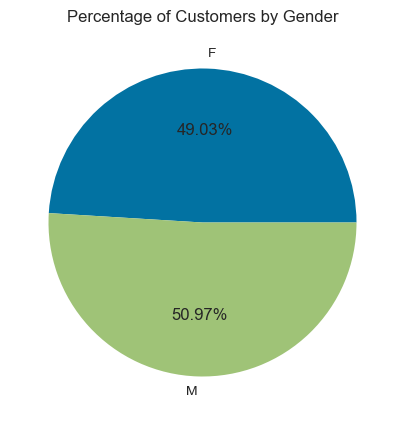

In [81]:
# plt.figure(figsize=(8,4))
# gender = sns.countplot(x=df['Gender'], order=df['Gender'].value_counts(ascending=False).index)
# values = df['Gender'].value_counts(ascending=False).values
# gender.bar_label(container=gender.containers[0], labels=values)
# plt.title("Customers by Gender")
# plt.show();

# Percentage of Customers by Gender
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df["Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of Customers by Gender")
plt.show();

- The number of Males customers is slightly higher than the Female customers.

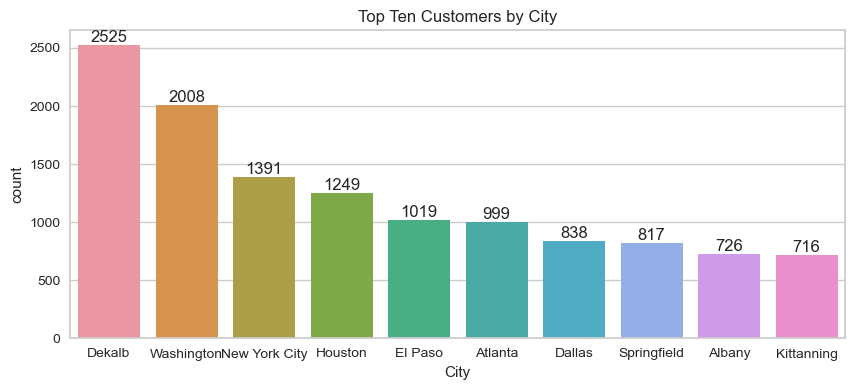

In [82]:
# Get the top five City
top_10_city = df['City'].value_counts().nlargest(10).index

top_10_city_data = df[df['City'].isin(top_10_city)]

plt.figure(figsize=(10,4))
city = sns.countplot(x=df['City'], order=top_10_city, data=top_10_city_data)
city.bar_label(container=city.containers[0], label=top_10_city)
plt.title('Top Ten Customers by City')
plt.show();

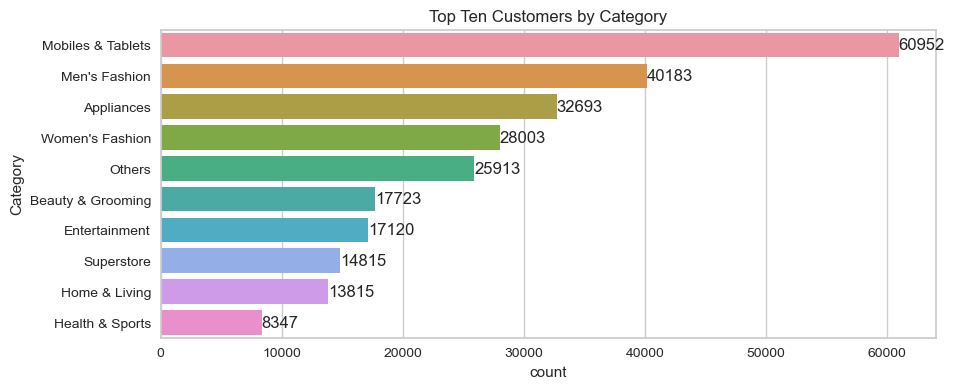

In [83]:
# Get the top ten Category
top_10_cat = df['Category'].value_counts().nlargest(10).index

top_10_data = df[df['Category'].isin(top_10_cat)]

plt.figure(figsize=(10,4))
category = sns.countplot(y=df['Category'], order=top_10_cat, data=top_10_data)
category.bar_label(container=category.containers[0], label=top_10_cat)
plt.title('Top Ten Customers by Category')
plt.show();

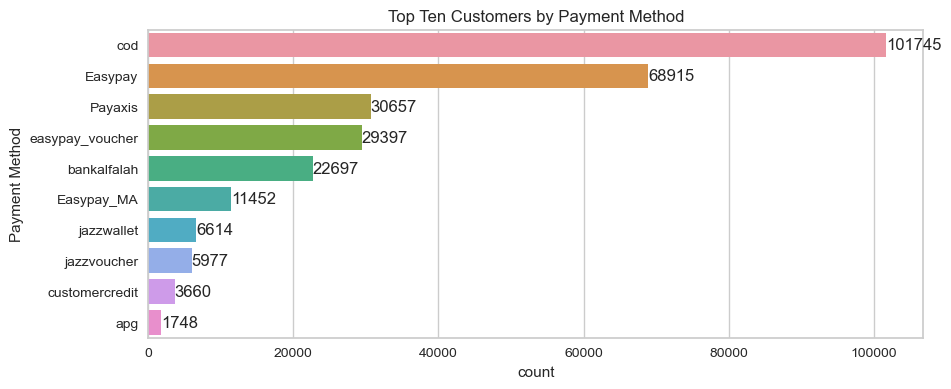

In [84]:
# Get the top ten Payment Methods
top_10_pay_meth = df['Payment Method'].value_counts().nlargest(10).index

top_10_pay_meth_data = df[df['Payment Method'].isin(top_10_pay_meth)]

plt.figure(figsize=(10,4))
pay_meth = sns.countplot(y=df['Payment Method'], order=top_10_pay_meth, data=top_10_pay_meth_data)
pay_meth.bar_label(container=pay_meth.containers[0], label=top_10_pay_meth)
plt.title('Top Ten Customers by Payment Method')
plt.show();

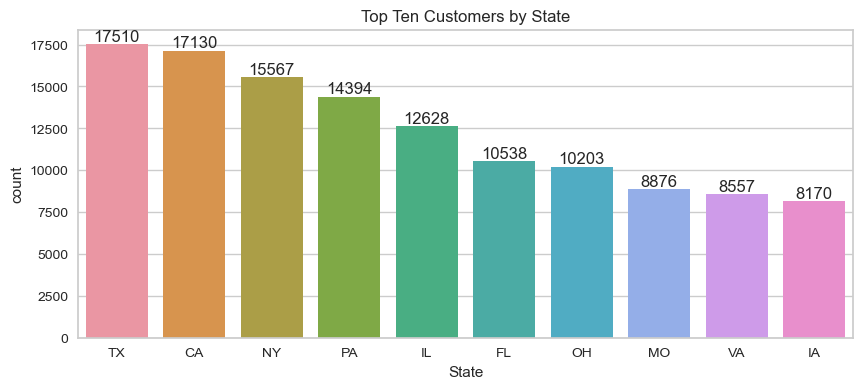

In [85]:
# Get the top ten States
top_10_states = df['State'].value_counts().nlargest(10).index

top_10_states_data = df[df['State'].isin(top_10_states)]

plt.figure(figsize=(10,4))
states = sns.countplot(x=df['State'], order=top_10_states, data=top_10_states_data)
states.bar_label(container=states.containers[0], label=top_10_states)
plt.title('Top Ten Customers by State')
plt.show();

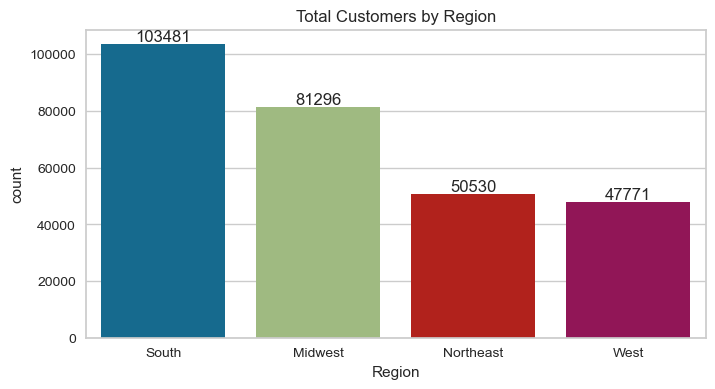

In [86]:
# Customers by Region
plt.figure(figsize=(8,4))
region = sns.countplot(x=df['Region'], order=df['Region'].value_counts(ascending=False).index)
region_val = df['Region'].value_counts(ascending=False).values
region.bar_label(container=region.containers[0], labels=region_val)
plt.title('Total Customers by Region')
plt.show();

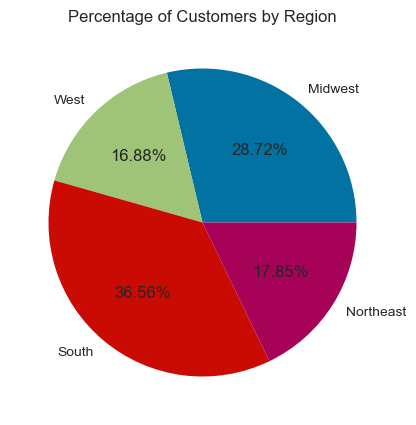

In [87]:
# Percentage of Customers by Region
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df["Region"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of Customers by Region")
plt.show();

In [89]:
# Label Encoding - Convert categorical data into numerical data
# encoder = LabelEncoder()

# for x in df.columns[0:]:
#     if (df[x].dtype == 'object'):
#         df[x] = encoder.fit_transform(df[x])
#     else:
#         df[x] = df[x]
# df.head(2)

In [ ]:
cust_data = df.groupby('Cust Id')
cust_data

total_sales = cust_data['Total'].sum()
total_orders = cust_data['Order Id'].size()
total_quantity = cust_data['Qty Ordered'].sum()

avg_order = total_sales / total_orders
avg__qty = total_sales / total_quantity

df1 = pd.DataFrame({'Total Sales': total_sales, 'Total Orders': total_orders, 'Average Orders': avg_order, 'Total Quantity': total_quantity});
df1.head(3)

,Total Sales,Total Orders,Average Orders,Total Quantity
Cust Id,,,,
4,27394.190,41,668.150976,82
15,216.800,6,36.133333,13
16,11868.899,20,593.444950,38


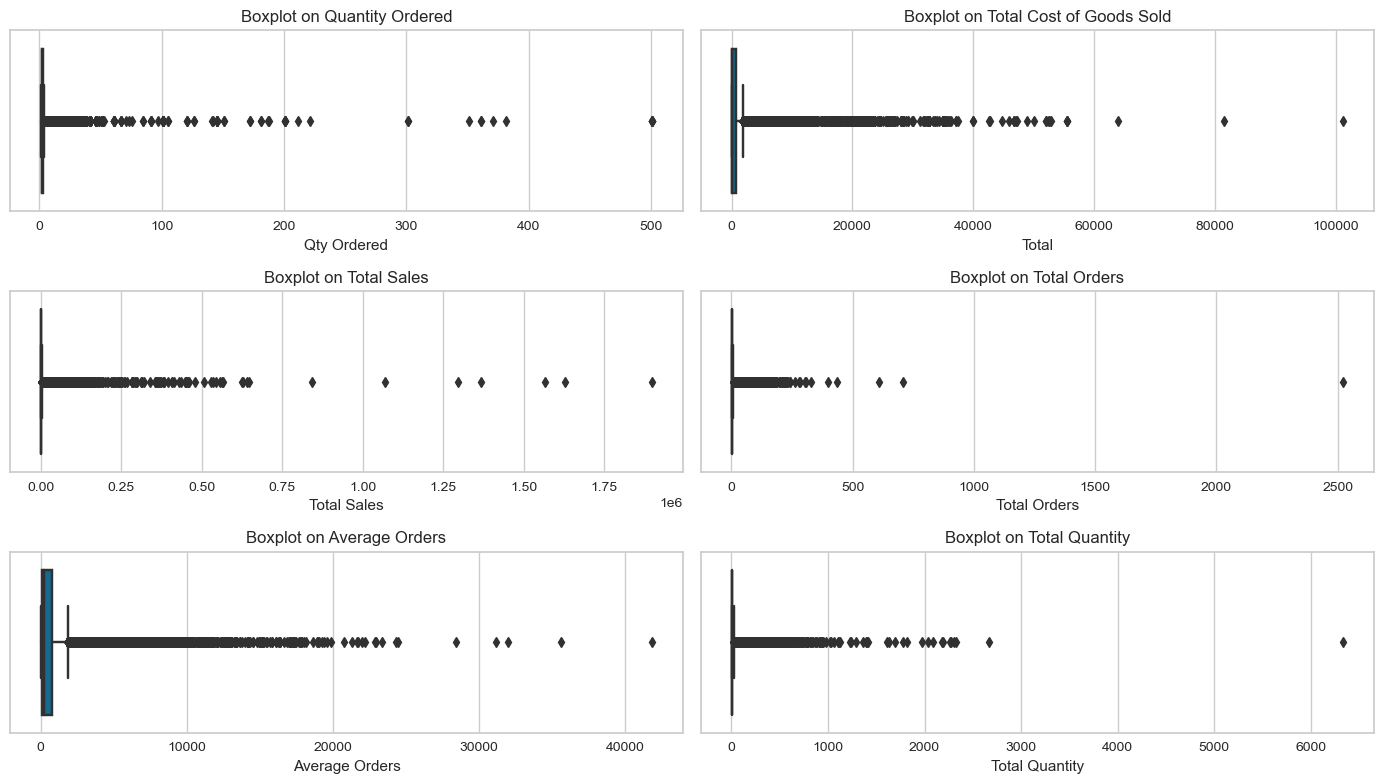

In [90]:
fig, axis = plt.subplots(3,2, figsize=(14,8))

sns.boxplot(x='Qty Ordered', data=df,  ax=axis[0,0])
axis[0,0].set_title("Boxplot on Quantity Ordered")

sns.boxplot(x='Total', data=df, ax=axis[0,1])
axis[0,1].set_title("Boxplot on Total Cost of Goods Sold")

sns.boxplot(x='Total Sales', data=df1, ax=axis[1,0])
axis[1,0].set_title('Boxplot on Total Sales')

sns.boxplot(x='Total Orders', data=df1, ax=axis[1,1])
axis[1,1].set_title('Boxplot on Total Orders')

sns.boxplot(x='Average Orders', data=df1, ax=axis[2,0])
axis[2,0].set_title('Boxplot on Average Orders')

sns.boxplot(x='Total Quantity', data=df1, ax=axis[2,1])
axis[2,1].set_title('Boxplot on Total Quantity')

plt.tight_layout();

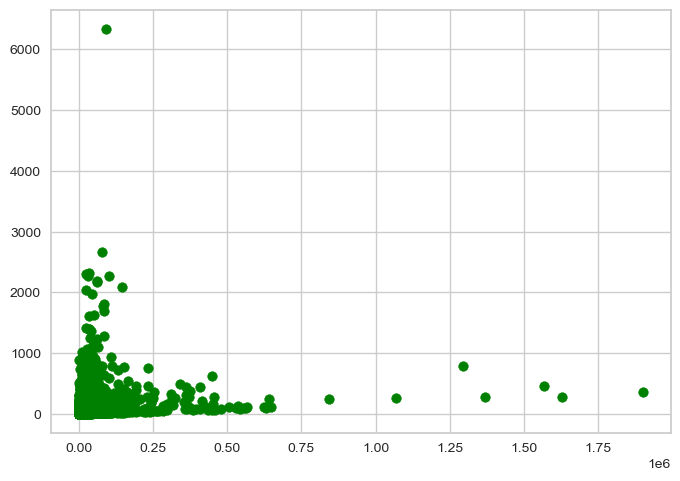

In [91]:
# Before Normalization
plt.scatter(data=df1, x='Total Sales', y='Total Quantity', marker='o', color='green');

## Data Normalization

In [92]:
scaler = MinMaxScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), index=df1.index, columns=df1.columns)
df1_scaled.head(3)

,Total Sales,Total Orders,Average Orders,Total Quantity
Cust Id,,,,
4,0.014416,0.015854,0.015958,0.012780
15,0.000114,0.001982,0.000863,0.001893
16,0.006246,0.007531,0.014174,0.005838


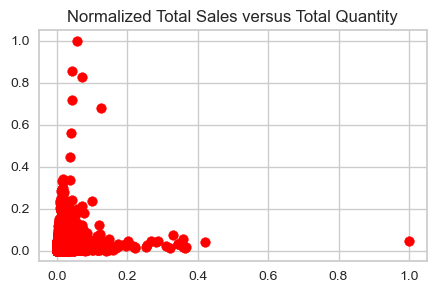

In [108]:
plt.figure(figsize=(5, 3))
plt.scatter(data=df1_scaled, x='Total Quantity', y='Total Sales', marker='o', color='red');
plt.title('Normalized Total Sales versus Total Quantity')
plt.show();

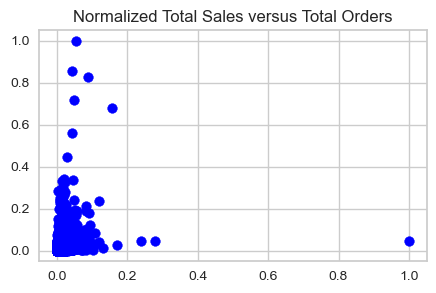

In [107]:
plt.figure(figsize=(5, 3))
plt.scatter(data=df1_scaled, x='Total Orders', y='Total Sales', marker='o', color='blue');
plt.title('Normalized Total Sales versus Total Orders')
plt.show();

## Model Building

# KMeans

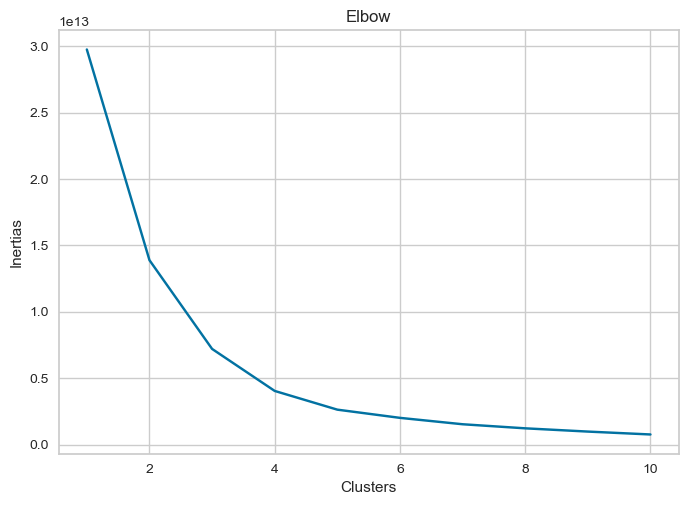

In [96]:
# Get optimum clusters
inertias = []
clusters = list(range(1,11)) # Create list of clusters from 1 to 10

for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)
    
plt.plot(clusters, inertias)
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.title('Elbow');

In [101]:
# Instantiate model
kmeans = KMeans(n_clusters=4)

# Fit and predict
labels = kmeans.fit_predict(df1)

#### Silhouette Score - measures distance between clusters (The closer it is to 1 the further the cluster samples are neighbouring from the cluster samples).

In [102]:
# Evaluate the algorithm clusters 
metrics.silhouette_score(df1, labels)

0.923653351927787

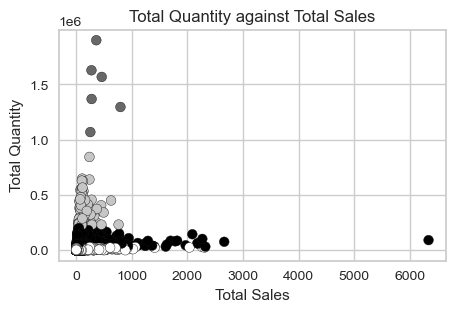

In [110]:
plt.figure(figsize=(5,3))
plt.scatter(df1['Total Quantity'],
            df1['Total Sales'],
            c = labels, edgecolors='k')
plt.xlabel('Total Sales')
plt.ylabel('Total Quantity')
plt.title('Total Quantity against Total Sales');

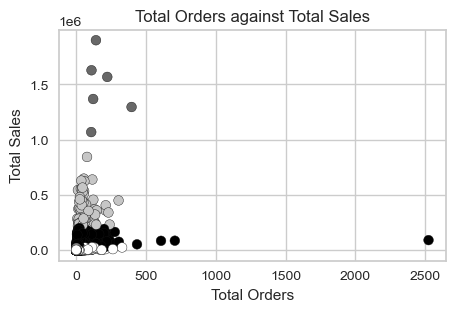

In [123]:
plt.figure(figsize=(5,3))
plt.scatter(df1['Total Orders'],
            df1['Total Sales'],
            c = labels, edgecolors='k')
plt.xlabel('Total Orders')
plt.ylabel('Total Sales')
plt.title('Total Orders against Total Sales');

### Hierarchichal Clustering

In [124]:
# # Create a cluster matrix
# linkage_matrix = linkage(df, method='ward', metric='euclidean')

# # Plot dendogram
# plt.figure(figsize=(12,8))
# dendrogram(linkage_matrix)
# plt.xlabel('Data Samples')
# plt.ylabel('Inter Cluster Distance')
# plt.title('Hierarchical Clustering');

### Gaussian Mixture

In [112]:
# elbow = KElbowVisualizer(estimator=KMeans())
# elbow.fit(df1_scaled)

In [113]:
# pca = PCA(n_components=4)

# pca_df = pd.DataFrame(pca.fit_transform(df1_scaled), columns=(['pca1', 'pca2', 'pca3', 'pca4']))
# pca_df.head(3)

In [114]:
# elbow = KElbowVisualizer(estimator=KMeans())
# elbow.fit(pca_df)

In [115]:
# x = pca_df['pca1']
# y = pca_df['pca2']
# z = pca_df['pca3']

# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x,y,z, marker='o')
# ax.set_title('3d Visualization of new Dimension');